In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score,log_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from transformers import BertTokenizer, BertModel
import torch
import seaborn as sns

In [ ]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load your dataset
df = pd.read_excel('/content/ooop2 project2.xlsx')  # Replace 'your_dataset.csv' with the path to your dataset

In [ ]:
columns_to_shuffle = ['Sentence','Label']
shuffled_df = df.sample(frac=1).reset_index(drop=True)
shuffled_df = pd.concat([shuffled_df.drop(columns=columns_to_shuffle), shuffled_df], axis=1)
#output_directory = "C:/Users/User/Downloads/"
#os.makedirs(outpu#shuffled_df.to_excel("/content/drive/My Drive/ResearchDomain/SAShuffledData.xlsx", index=False)
print(shuffled_df)

                                               Sentence  Label
0     They attended a science exhibition at the museum.      1
1     Research vessels conduct experiments at sea, p...      0
2     Obtaining cybersecurity certification can help...      0
3       She took a dance class and learned salsa moves.      1
4            Bangladeshi dishes will evolve constantly.      2
...                                                 ...    ...
2995  Managed aquifer recharge (MAR) is a specific t...      0
2996  The wind howls through the trees, whipping dar...      0
2997   The freelancer uses the laptop to connect wit...      0
2998  Conservation efforts are underway to protect e...      0
2999               They will build a prosperous nation.      2

[3000 rows x 2 columns]


In [ ]:
# Split the data into features and labels
X = shuffled_df['Sentence']
y = shuffled_df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83       225
           1       0.84      0.94      0.89       185
           2       0.82      0.93      0.87       190

    accuracy                           0.86       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.86      0.86       600

Confusion Matrix for KNN:
 [[168  24  33]
 [  6 174   5]
 [  5   8 177]]


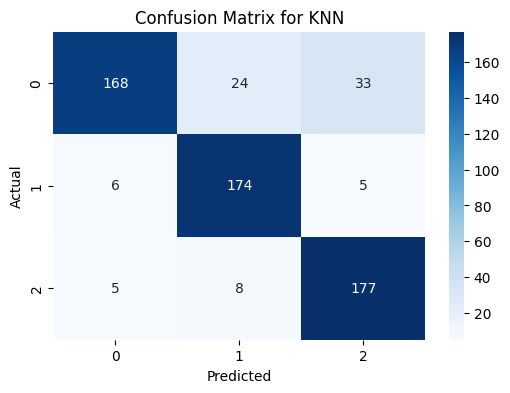

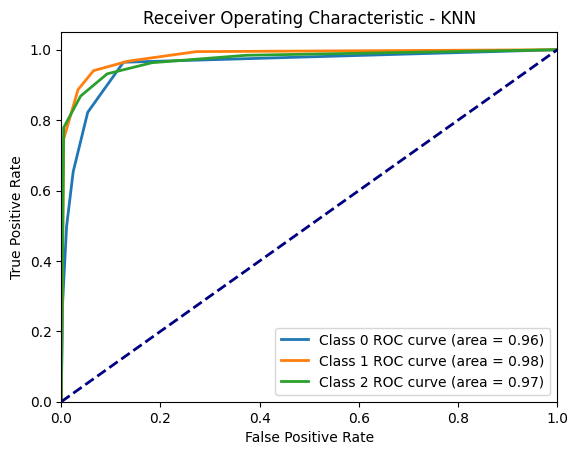

Train Accuracy for KNN: 0.9437
Test Accuracy for KNN: 0.8650
Train Loss for KNN: 0.16734550073491752
Test Loss for KNN: 0.9884255136943442




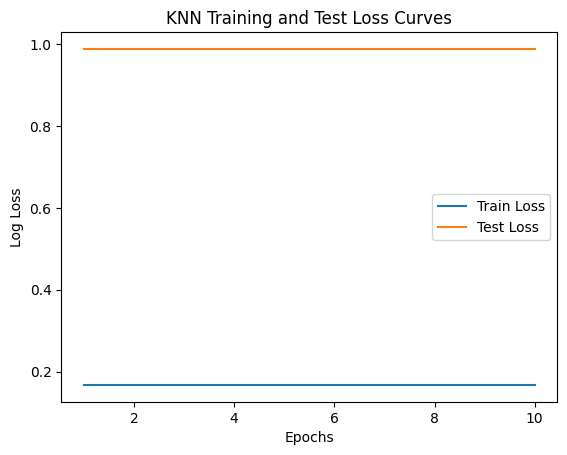

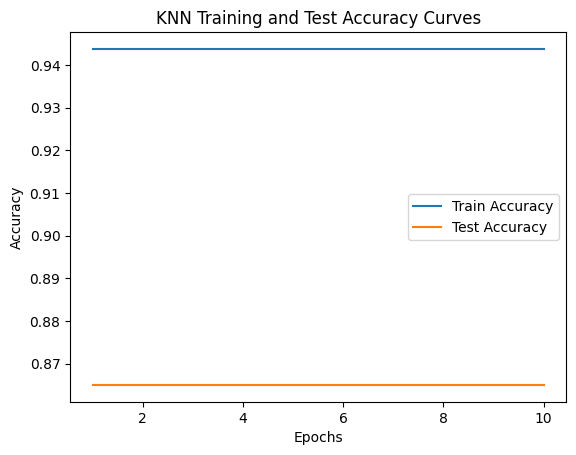

Classification Report for MNB:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       225
           1       0.93      0.96      0.94       185
           2       0.97      0.98      0.97       190

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix for MNB:
 [[207  12   6]
 [  8 177   0]
 [  3   1 186]]


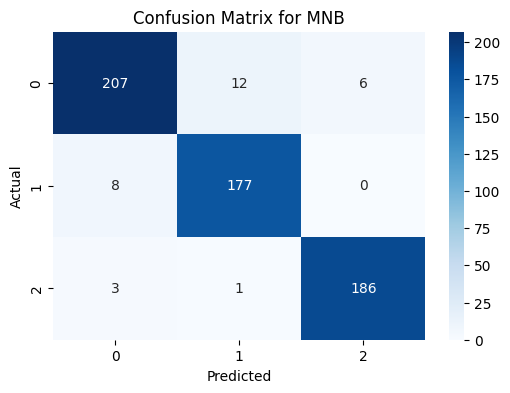

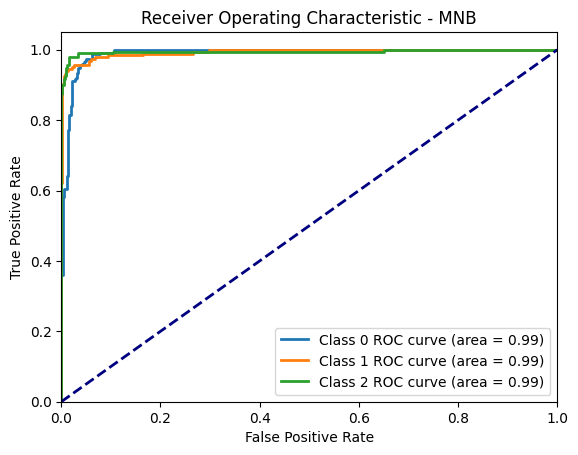

Train Accuracy for MNB: 0.9904
Test Accuracy for MNB: 0.9500
Train Loss for MNB: 0.18656253105222637
Test Loss for MNB: 0.2899702705754447




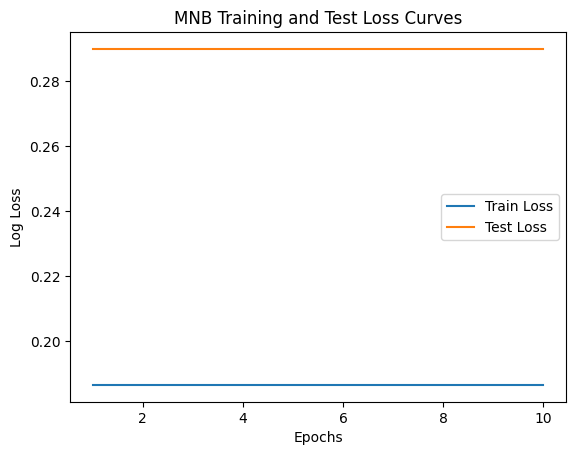

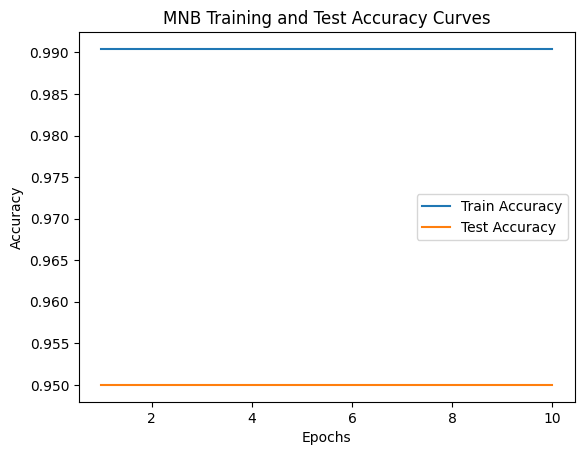

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       225
           1       0.98      0.95      0.96       185
           2       0.99      0.98      0.99       190

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

Confusion Matrix for SVM:
 [[221   3   1]
 [  9 176   0]
 [  3   1 186]]


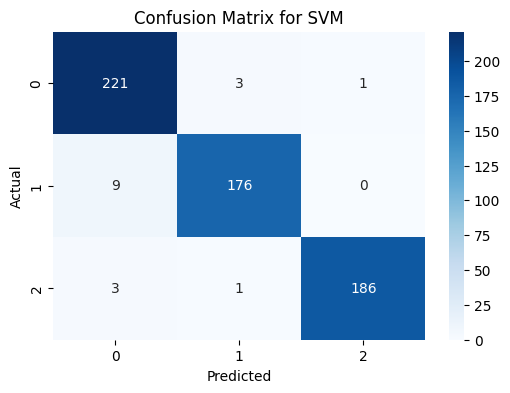

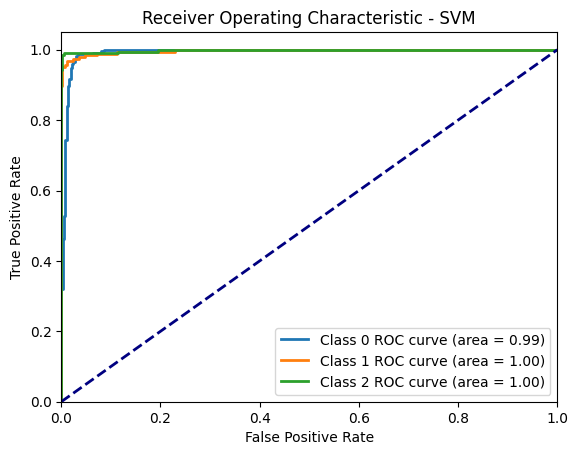

Train Accuracy for SVM: 0.9975
Test Accuracy for SVM: 0.9717
Train Loss for SVM: 0.007346895412597309
Test Loss for SVM: 0.09224070106294255




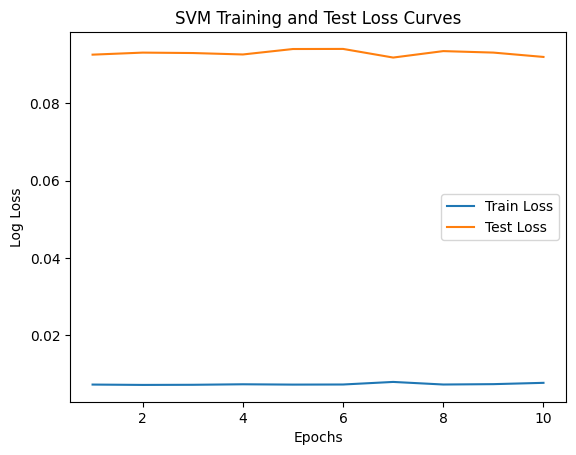

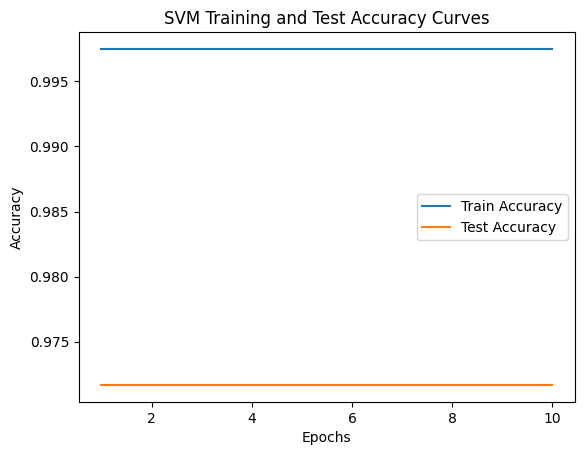

Classification Report for DT:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85       225
           1       0.79      0.93      0.85       185
           2       0.98      0.98      0.98       190

    accuracy                           0.89       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.89      0.89       600

Confusion Matrix for DT:
 [[177  47   1]
 [ 10 172   3]
 [  3   0 187]]


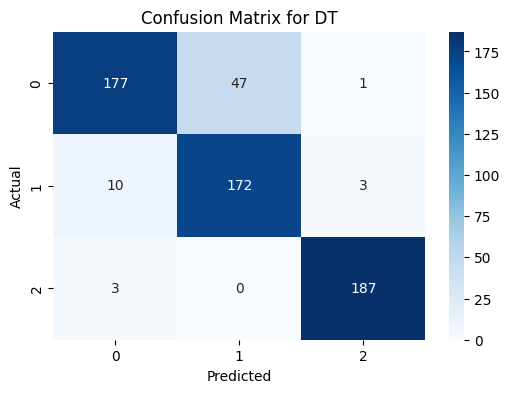

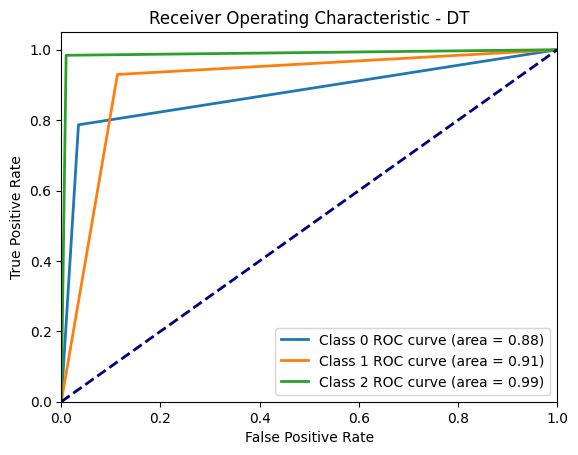

Train Accuracy for DT: 1.0000
Test Accuracy for DT: 0.8933
Train Loss for DT: 4.440892098500627e-16
Test Loss for DT: 3.84465636150583




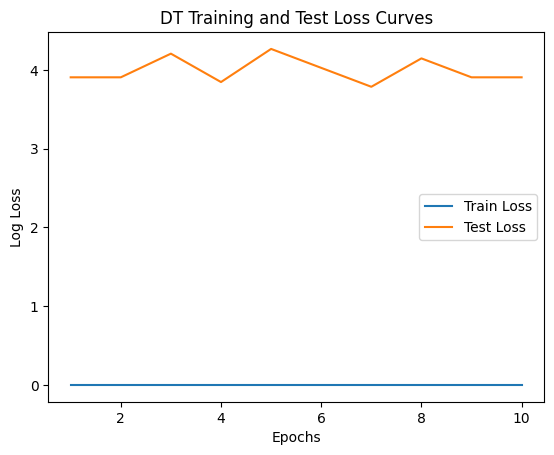

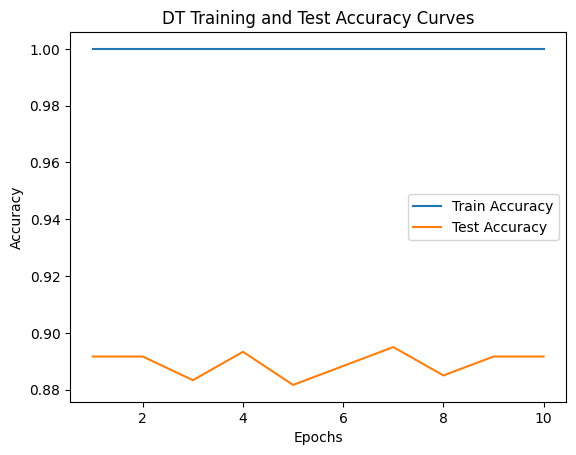

[0]	validation_0-mlogloss:0.78193	validation_0-merror:0.06458	validation_1-mlogloss:0.83605	validation_1-merror:0.13333
[1]	validation_0-mlogloss:0.59211	validation_0-merror:0.05792	validation_1-mlogloss:0.68447	validation_1-merror:0.13500
[2]	validation_0-mlogloss:0.46383	validation_0-merror:0.04750	validation_1-mlogloss:0.58231	validation_1-merror:0.11667
[3]	validation_0-mlogloss:0.37553	validation_0-merror:0.04750	validation_1-mlogloss:0.51899	validation_1-merror:0.11833
[4]	validation_0-mlogloss:0.30839	validation_0-merror:0.04250	validation_1-mlogloss:0.46850	validation_1-merror:0.12000
[5]	validation_0-mlogloss:0.26194	validation_0-merror:0.04375	validation_1-mlogloss:0.42957	validation_1-merror:0.11667
[6]	validation_0-mlogloss:0.22356	validation_0-merror:0.04125	validation_1-mlogloss:0.39863	validation_1-merror:0.11667
[7]	validation_0-mlogloss:0.19573	validation_0-merror:0.04042	validation_1-mlogloss:0.37334	validation_1-merror:0.11167
[8]	validation_0-mlogloss:0.17278	valida

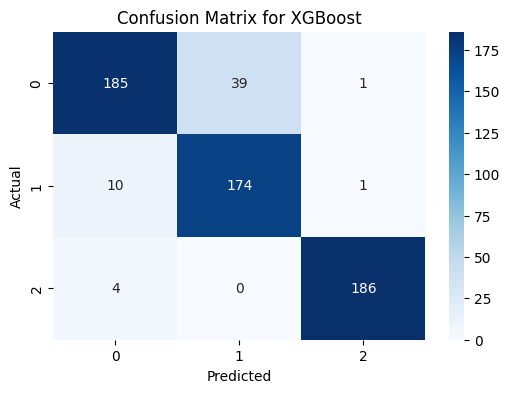

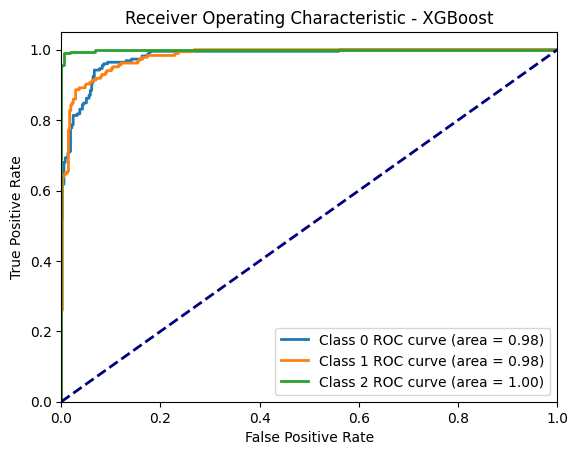

Train Accuracy for XGBoost: 0.9992
Test Accuracy for XGBoost: 0.9083
Train Loss for XGBoost: 0.015904673116316277
Test Loss for XGBoost: 0.24289310614628098




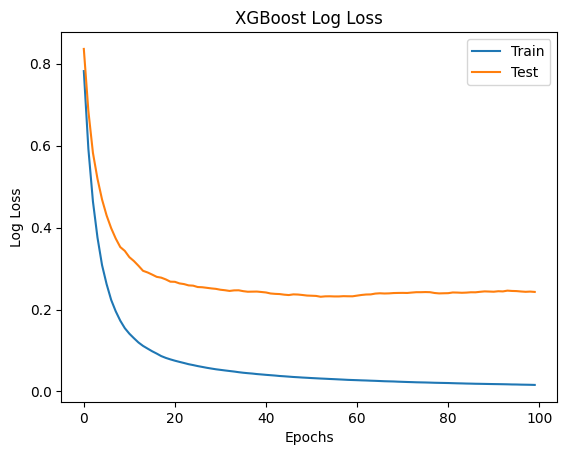

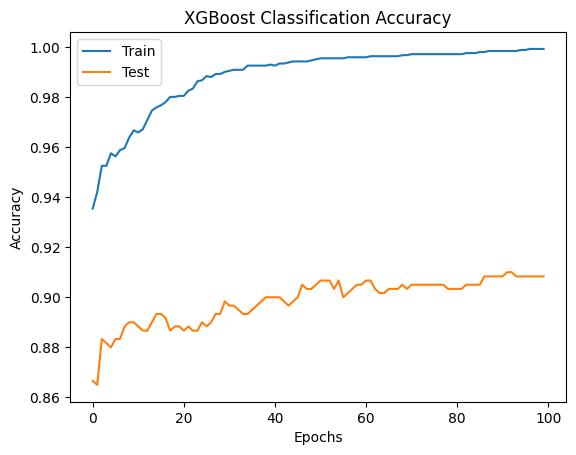

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       225
           1       0.90      0.95      0.93       185
           2       0.97      0.99      0.98       190

    accuracy                           0.94       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.94      0.94      0.94       600

Confusion Matrix for Random Forest:
 [[201  19   5]
 [  9 176   0]
 [  1   0 189]]


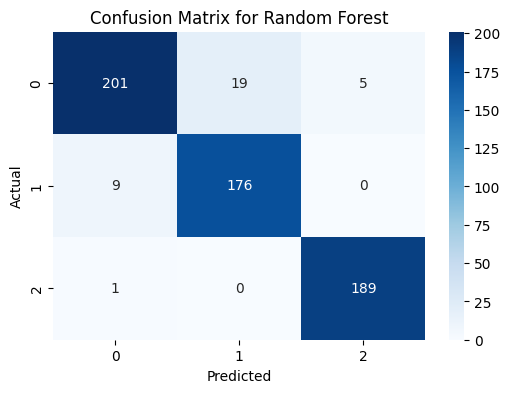

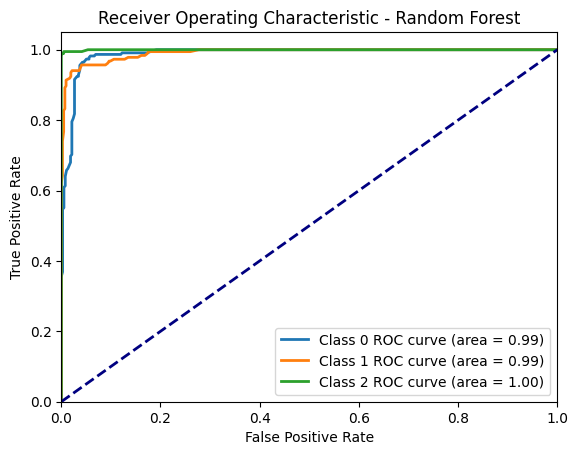

Train Accuracy for Random Forest: 1.0000
Test Accuracy for Random Forest: 0.9433
Train Loss for Random Forest: 0.045360569096247416
Test Loss for Random Forest: 0.22395580063473025




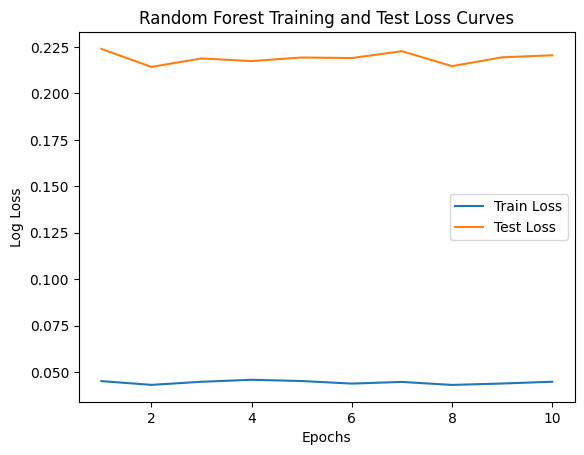

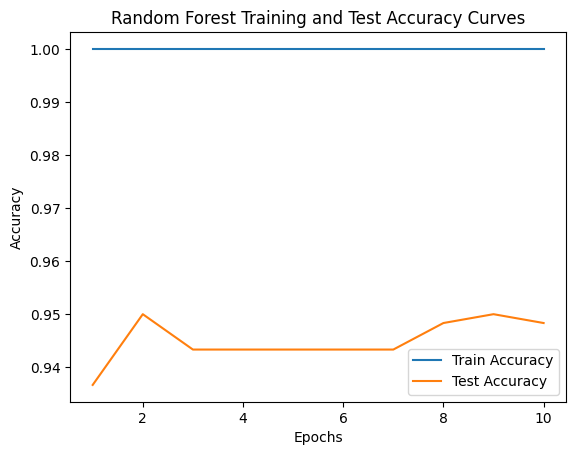

In [ ]:
# Binarize the output labels for ROC calculation
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]




# Function to evaluate the model
def evaluate_model(model, X_train_vec, X_test_vec, y_train, y_test, y_train_bin, y_test_bin, model_name):
    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict the results
    train_predictions = model.predict(X_train_vec)
    test_predictions = model.predict(X_test_vec)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Calculate loss
    if hasattr(model, "predict_proba"):
        train_loss = log_loss(y_train, model.predict_proba(X_train_vec))
        test_loss = log_loss(y_test, model.predict_proba(X_test_vec))
    else:
        train_loss = None
        test_loss = None

    # Print classification report
    print(f'Classification Report for {model_name}:\n', classification_report(y_test, test_predictions))

    # Print confusion matrix
    print(f'Confusion Matrix for {model_name}:\n', confusion_matrix(y_test, test_predictions))
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, test_predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve for each class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_vec)
    else:
        y_prob = model.decision_function(X_test_vec)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize the scores to [0, 1]

    # Compute ROC curve and ROC area for each class
    plt.figure()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Print train and test accuracy
    print(f'Train Accuracy for {model_name}: {train_accuracy:.4f}')
    print(f'Test Accuracy for {model_name}: {test_accuracy:.4f}')

    # Print train and test loss
    print(f'Train Loss for {model_name}: {train_loss}')
    print(f'Test Loss for {model_name}: {test_loss}')
    print('\n')

# Custom training loop for a given model
def custom_train_model(model, X_train_vec, y_train, X_test_vec, y_test, epochs=10):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.fit(X_train_vec, y_train)

        # Predict on train and test sets
        train_pred = model.predict(X_train_vec)
        test_pred = model.predict(X_test_vec)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        # Calculate loss (log loss)
        if hasattr(model, "predict_proba"):
            train_loss = log_loss(y_train, model.predict_proba(X_train_vec))
            test_loss = log_loss(y_test, model.predict_proba(X_test_vec))
        else:
            train_loss = None
            test_loss = None

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return model, train_losses, test_losses, train_accuracies, test_accuracies

# Plotting the curves for models
def plot_custom_training_curves(train_losses, test_losses, train_accuracies, test_accuracies, model_name):
    epochs = range(1, len(train_losses) + 1)

    plt.figure()
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title(f'{model_name} Training and Test Loss Curves')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Training and Test Accuracy Curves')
    plt.legend()
    plt.show()

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn, knn_train_losses, knn_test_losses, knn_train_accuracies, knn_test_accuracies = custom_train_model(knn, X_train_vec, y_train, X_test_vec, y_test, epochs=10)
evaluate_model(knn, X_train_vec, X_test_vec, y_train, y_test, y_train_bin, y_test_bin, 'KNN')
plot_custom_training_curves(knn_train_losses, knn_test_losses, knn_train_accuracies, knn_test_accuracies, 'KNN')

# Multinomial Naive Bayes (MNB)
mnb = MultinomialNB()
mnb, mnb_train_losses, mnb_test_losses, mnb_train_accuracies, mnb_test_accuracies = custom_train_model(mnb, X_train_vec, y_train, X_test_vec, y_test, epochs=10)
evaluate_model(mnb, X_train_vec, X_test_vec, y_train, y_test, y_train_bin, y_test_bin, 'MNB')
plot_custom_training_curves(mnb_train_losses, mnb_test_losses, mnb_train_accuracies, mnb_test_accuracies, 'MNB')

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm, svm_train_losses, svm_test_losses, svm_train_accuracies, svm_test_accuracies = custom_train_model(svm, X_train_vec, y_train, X_test_vec, y_test, epochs=10)
evaluate_model(svm, X_train_vec, X_test_vec, y_train, y_test, y_train_bin, y_test_bin, 'SVM')
plot_custom_training_curves(svm_train_losses, svm_test_losses, svm_train_accuracies, svm_test_accuracies, 'SVM')

# Decision Tree (DT)
dt = DecisionTreeClassifier()
dt, dt_train_losses, dt_test_losses, dt_train_accuracies, dt_test_accuracies = custom_train_model(dt, X_train_vec, y_train, X_test_vec, y_test, epochs=10)
evaluate_model(dt, X_train_vec, X_test_vec, y_train, y_test, y_train_bin, y_test_bin, 'DT')
plot_custom_training_curves(dt_train_losses, dt_test_losses, dt_train_accuracies, dt_test_accuracies, 'DT')

# XGBoost
xgb = XGBClassifier(use_label_encoder=False)
xgb.set_params(eval_metric=["mlogloss", "merror"])
eval_set = [(X_train_vec, y_train), (X_test_vec, y_test)]
xgb.fit(X_train_vec, y_train, eval_set=eval_set, verbose=True)
evaluate_model(xgb, X_train_vec, X_test_vec, y_train, y_test, y_train_bin, y_test_bin, 'XGBoost')

# Plotting the curves for XGBoost
eval_result = xgb.evals_result()
epochs = len(eval_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, eval_result['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, eval_result['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

fig, ax = plt.subplots()
ax.plot(x_axis, [1 - x for x in eval_result['validation_0']['merror']], label='Train')
ax.plot(x_axis, [1 - x for x in eval_result['validation_1']['merror']], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('XGBoost Classification Accuracy')
plt.show()

# Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100)
rf, rf_train_losses, rf_test_losses, rf_train_accuracies, rf_test_accuracies = custom_train_model(rf, X_train_vec, y_train, X_test_vec, y_test, epochs=10)
evaluate_model(rf, X_train_vec, X_test_vec, y_train, y_test, y_train_bin, y_test_bin, 'Random Forest')
plot_custom_training_curves(rf_train_losses, rf_test_losses, rf_train_accuracies, rf_test_accuracies, 'Random Forest')

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_predictions = knn.predict(X_test_vec)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy:.4f}')

KNN Accuracy: 0.8650


In [ ]:
# Multinomial Naive Bayes (MNB)
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
mnb_predictions = mnb.predict(X_test_vec)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
print(f'MNB Accuracy: {mnb_accuracy:.4f}')

MNB Accuracy: 0.9500


In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)
svm_predictions = svm.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

SVM Accuracy: 0.9717


In [ ]:
# Decision Tree (DT)
dt = DecisionTreeClassifier()
dt.fit(X_train_vec, y_train)
dt_predictions = dt.predict(X_test_vec)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'DT Accuracy: {dt_accuracy:.4f}')

DT Accuracy: 0.8850


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_vec, y_train)
xgb_predictions = xgb.predict(X_test_vec)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')

XGBoost Accuracy: 0.9083


In [ ]:
# Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vec, y_train)
rf_predictions = rf.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

Random Forest Accuracy: 0.9567
